In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st

company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_avg = pd.read_csv('/datasets/project_sql_result_04.csv')
trips_loop = pd.read_csv('/datasets/project_sql_result_07.csv')

In [2]:
# Cleaning data

print("Number of duplicates in 'company_trips': ", company_trips.duplicated().sum())
print("Number of duplicates in 'dropoff_avg': ", dropoff_avg.duplicated().sum())
print()
print("Number of NaN values in 'company_trips': \n", company_trips.isna().sum())
print()
print("Number of NaN values in 'dropoff_avg': \n", dropoff_avg.isna().sum())
print()
print("'company_trips' data types: ")
print(company_trips.dtypes)
print()
print("'dropoff_avg' data types: ")
print(dropoff_avg.dtypes)

Number of duplicates in 'company_trips':  0
Number of duplicates in 'dropoff_avg':  0

Number of NaN values in 'company_trips': 
 company_name    0
trips_amount    0
dtype: int64

Number of NaN values in 'dropoff_avg': 
 dropoff_location_name    0
average_trips            0
dtype: int64

'company_trips' data types: 
company_name    object
trips_amount     int64
dtype: object

'dropoff_avg' data types: 
dropoff_location_name     object
average_trips            float64
dtype: object


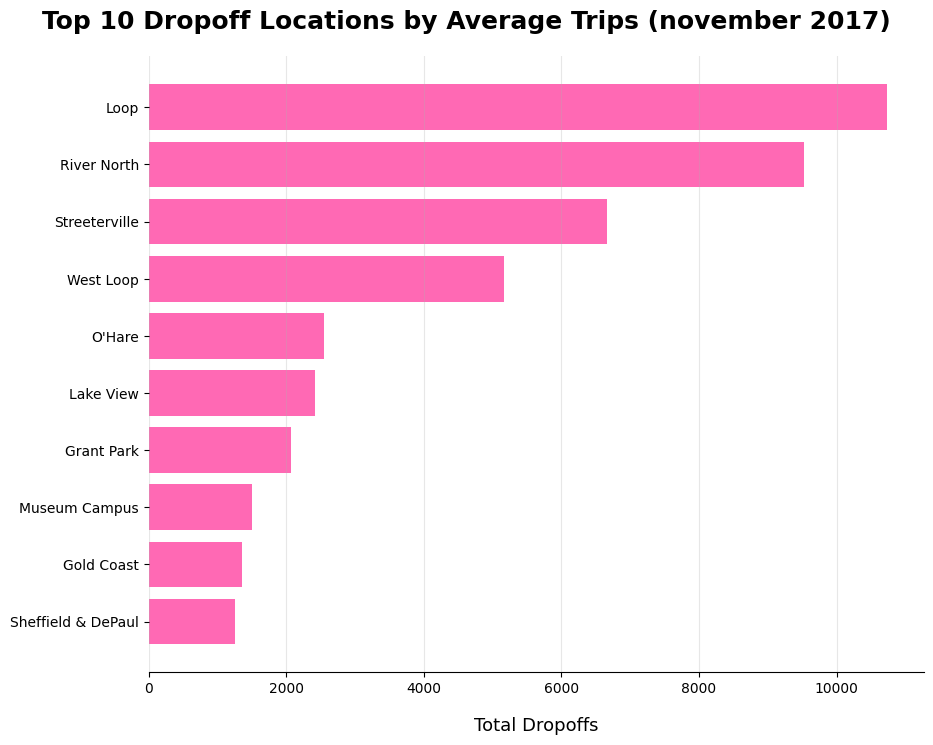

In [3]:
top_ten_towns = dropoff_avg.sort_values('average_trips', ascending=False).head(10)

plt.figure(figsize=(10,8))
plt.barh(top_ten_towns['dropoff_location_name'], top_ten_towns['average_trips'],
         color='hotpink')
plt.grid(axis='x', alpha=0.3)
plt.title('Top 10 Dropoff Locations by Average Trips (november 2017)',
          fontsize=18, pad=20, fontweight='bold', x=0.41)
plt.xlabel('Total Dropoffs', fontsize=13, labelpad=15)
plt.gca().invert_yaxis()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

<div>
El análisis de viajes realizado para el mes de noviembre de 2017 revela que las ubicaciones de Loop, River North, Streeterville, y West Loop son de suma importancia para estas compañías de taxi. Estas áreas representan consistentemente los destinos más solicitados por los clientes, superando a los demás por un margen significativo en términos de demanda. Sin embargo, es <strong> crucial analizar los datos correspondientes a otros meses </strong> para determinar si esta alta concentración de demanda es una tendencia constante y habitual para los usuarios, o si, por el contrario, fue un fenómeno temporal impulsado por algún evento o particularidad específica del mes de noviembre.
</div>

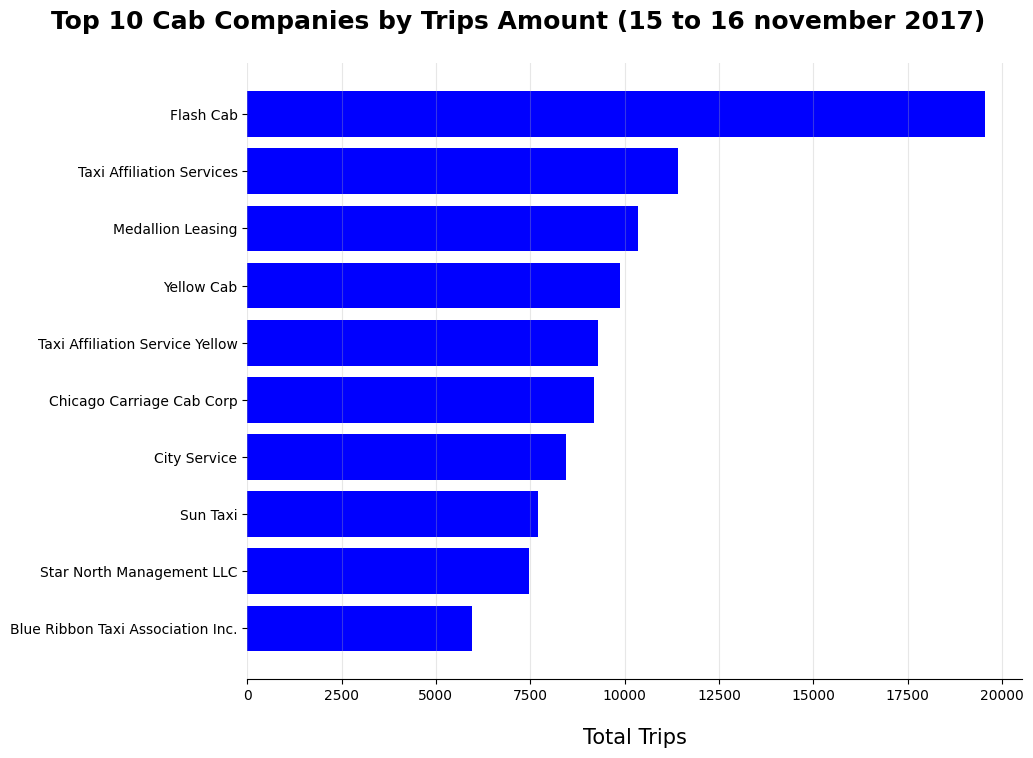

In [4]:

top_ten_companies = company_trips.sort_values('trips_amount', ascending=False).head(10)

plt.figure(figsize=(10,8))
plt.barh(top_ten_companies['company_name'], top_ten_companies['trips_amount'],
         color='blue')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')

plt.title('Top 10 Cab Companies by Trips Amount (15 to 16 november 2017)', 
          fontsize=18, pad=25, fontweight='bold',x=0.35)
plt.xlabel('Total Trips', fontsize=15, labelpad=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()


El análisis de viajes de los días 15 y 16 de noviembre de 2017 revela que la compañía Flash Cab obtuvo una cantidad significativamente mayor de viajes que cualquier otra compañía. Probablemente otorgue más servicio para las  locaciones con más demanda del anterior gráfico (Loop, River North, Streeterville, y West Loop). Dado que el resto de las compañías de taxi muestran una cuota de mercado mucho más equilibrada, es crucial llevar a cabo un análisis exhaustivo para comprender los factores específicos que contribuyeron al éxito singular de Flash Cab durante este período.

## **📊 Prueba de Hipótesis**

<div style=" padding:15px; border-left:15px">

   <h3><strong> Hipótesis nula</strong></h3>
  <p>
      "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare<strong> es la misma</strong> en los sábados lluviosos".
  </p> 
  <h3><strong> Hipótesis alternativa</strong></h3>
  <p>
      "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare<strong> cambia</strong> los sábados lluviosos".
  </p>
    
</div>

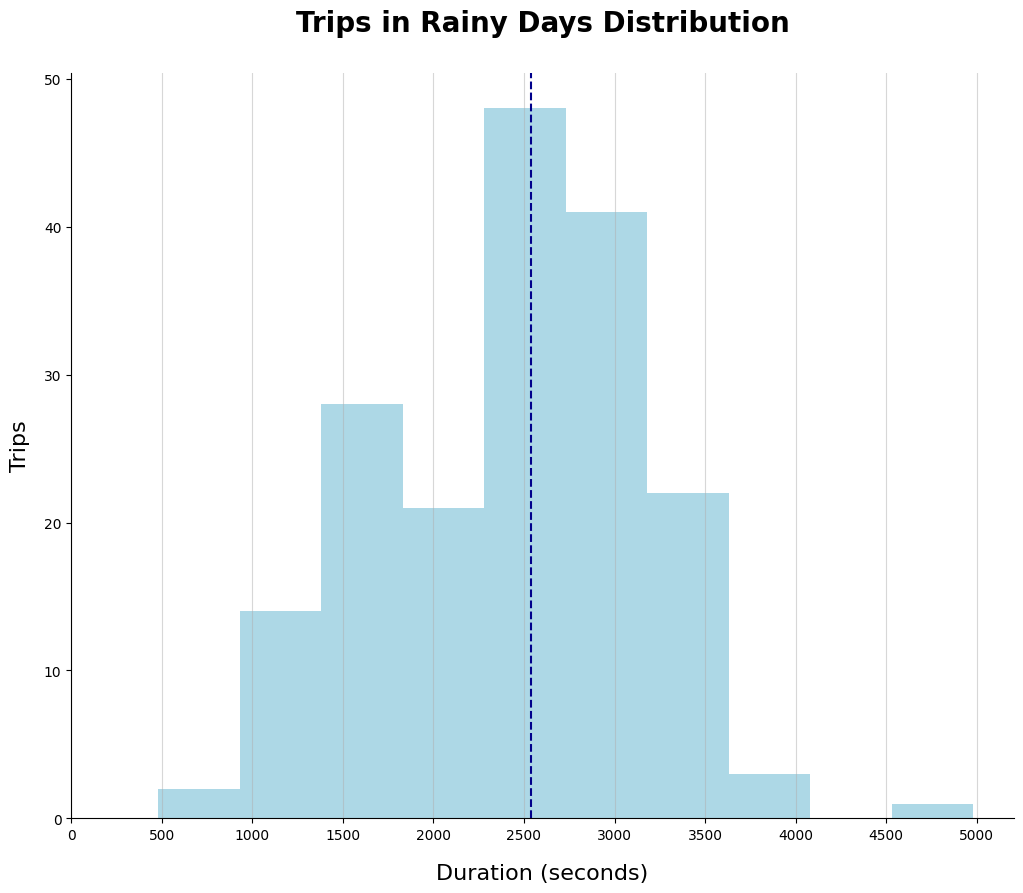

In [5]:
rainy_days = trips_loop[trips_loop['weather_conditions']=='Bad']

plt.figure(figsize=(10,8))
plt.hist(rainy_days['duration_seconds'], color='lightblue', bins=10)
plt.xticks(range(0, 5500, 500))

plt.grid(axis='x',alpha=0.5)
plt.tight_layout()
plt.axvline(rainy_days['duration_seconds'].median(), color='darkblue', linestyle='dashed')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Duration (seconds)', fontsize=16,labelpad=15)
plt.ylabel('Trips', fontsize=16, labelpad=10)
plt.title('Trips in Rainy Days Distribution', fontsize=20, fontweight='bold', pad=30)
plt.show()


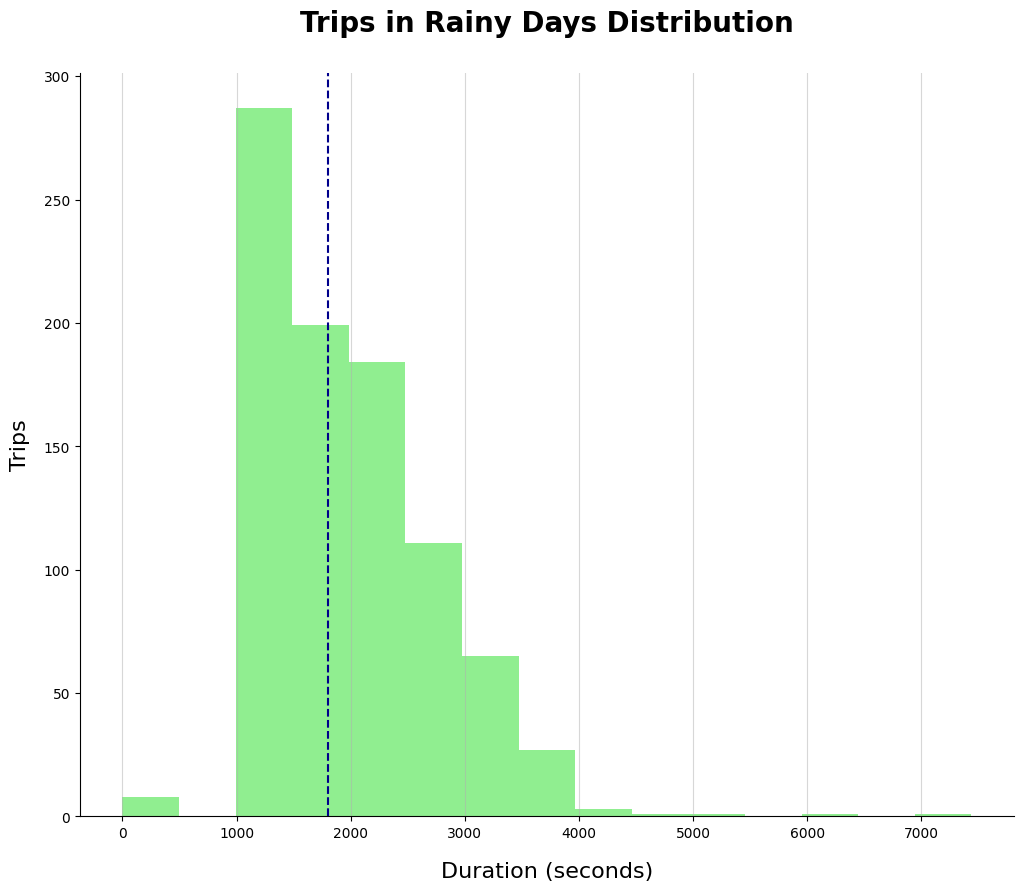

In [6]:
non_rainy_days = trips_loop[trips_loop['weather_conditions']=='Good']

plt.figure(figsize=(10,8))
plt.hist(non_rainy_days['duration_seconds'], color='lightgreen', bins=15)

plt.grid(axis='x',alpha=0.5)
plt.tight_layout()
plt.axvline(non_rainy_days['duration_seconds'].median(), color='darkblue', linestyle='dashed')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Duration (seconds)', fontsize=16,labelpad=15)
plt.ylabel('Trips', fontsize=16, labelpad=10)
plt.title('Trips in Rainy Days Distribution', fontsize=20, fontweight='bold', pad=30)
plt.show()

## 🧪 Test de levene

In [7]:

alpha = 0.05

levene = st.levene(non_rainy_days['duration_seconds'],rainy_days['duration_seconds'])
if levene.pvalue<alpha:
    print("Estableceremos el valor 'equal_var' en 'False'")
    print(levene.pvalue)
else:
    print("Estableceremos el valor 'equal_var' en 'True'")
    print(levene.pvalue)


Estableceremos el valor 'equal_var' en 'True'
0.5332038671974493


In [8]:
results = st.ttest_ind(non_rainy_days['duration_seconds'], 
                           rainy_days['duration_seconds'], equal_var=True)

print('Valor P: ', results.pvalue)

if results.pvalue<alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No rechazamos la hipótesis nula')


Valor P:  6.517970327099473e-12
Rechazamos la hipótesis nula


Para probar la hipótesis, se establecieron las hipótesis nula ($H_0$) y alternativa ($H_A$): $H_0$ postuló que no existe una diferencia significativa en la duración promedio de los viajes entre sábados lluviosos y no lluviosos, mientras que $H_A$ postuló que sí existe una diferencia significativa.

El método seleccionado para la verificación fue la Prueba t de Muestras Independientes (scipy.stats.ttest_ind), el cual es el más apropiado para comparar las medias de dos grupos de datos separados. El criterio para rechazar $H_0$ se estableció con un nivel de significancia ($\alpha$) de $0.05$.

El proceso de validación comenzó con la Prueba de Levene para verificar la homogeneidad de varianzas, un paso crucial para configurar correctamente la Prueba t. El Valor $P$ de Levene ($0.5332$) fue superior a $\alpha=0.05$, lo que llevó a no rechazar la hipótesis nula de varianzas iguales. Por consiguiente, la Prueba t se ejecutó con el parámetro equal_var='True'.

Finalmente, al ejecutar la Prueba t, se obtuvo un Valor $P$ de $6.51797... \times 10^{-12}$. Dado que este Valor $P$ es drásticamente menor que el criterio $\alpha=0.05$, se procedió a rechazar la hipótesis nula ($H_0$). Esta conclusión confirma que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare sí cambia significativamente los sábados lluviosos en comparación con los sábados no lluviosos.

## Conclusión

<p style="text-align: justify">
La estrategia inmediata de la empresa Zuber debe enfocarse en maximizar su presencia y eficiencia en las locaciones de Loop, River North, Streeterville y West Loop, dado que estas representan los destinos más demandados por un margen considerable en comparación con otras compañías. Es igualmente crucial <strong>analizar detalladamente la operativa de la empresa competidora Flash Cab</strong>, cuyo éxito no puede ignorarse: obtuvo casi el doble de viajes que el segundo lugar (Taxi Affiliation Services) durante el periodo de estudio (15 y 16 de noviembre de 2017).</p>
<p style="text-align: justify">
En el ámbito operacional, la <strong>hipótesis nula</strong> que proponía la igualdad en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en sábados lluviosos fue <strong>categóricamente rechazada</strong>. Este hallazgo estadístico confirma que la duración de los viajes a este destino <strong>aumenta significativamente</strong> durante los días de lluvia.
</p>
<p style="text-align: justify">
Esta variación es consistente con el análisis de la distribución de los datos: mientras que la media de la duración en los sábados lluviosos es notablemente más alta, su distribución de tiempos de viaje se acerca a una forma más normal. Por el contrario, la distribución de los viajes en días no lluviosos se encuentra más sesgada hacia la izquierda, indicando una mayor frecuencia de tiempos de viaje cortos.
</p>